1. Загрузите датасет transaction_data.csv. Проверьте размер таблицы, типы переменных, число пропущенных значений и описательную статистику.

Вопрос: сколько в датасете пропущенных значений?

In [51]:
import pandas as pd
import numpy as np
from scipy import stats as st
import seaborn as sns
from matplotlib import pyplot as plt

df = pd.read_csv('https://stepik.org/media/attachments/lesson/361624/transaction_data.csv')
df.head()

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5315 entries, 0 to 5314
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         5315 non-null   object
 1   name         5315 non-null   object
 2   transaction  5315 non-null   object
dtypes: object(3)
memory usage: 124.7+ KB


In [53]:
print('В dataset пропущенных значений нет')

В dataset пропущенных значений нет


2. Проверьте, какие значения принимает колонка transaction? Сколько наблюдений относятся к тому или иному уровню? Визуализируйте результат с помощью барплота.

Вопрос: расположите уровни переменной в порядке убывания числа относящихся наблюдений (от большего к меньшему)

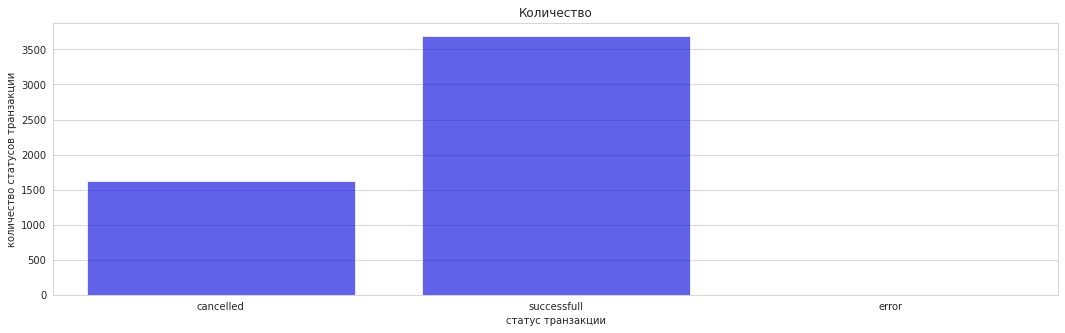

In [54]:
def draw_graph_countplot(value, name_x, name_y, title):
    plt.figure(figsize=(18, 5))
    sns.set_style('whitegrid')
    sns.countplot(value, color = 'blue',alpha = 0.7)
    plt.title(title)
    plt.xlabel(name_x)
    plt.ylabel(name_y)
    

title = "Количество"
name_y = "количество статусов транзакции"
name_x = "статус транзакции"
draw_graph_countplot(df.transaction, name_x, name_y, title)

3. Подумайте, хорош ли полученный график?
    - У графика неправильно подписаны оси
    - Да, это просто график мечты!
    - **Плохо видно число наблюдений у некоторых значений**
    - На барплоте не может быть квалитативных переменных

4. Сколько произошло ошибок? 

In [55]:
df.query('transaction == "error"').count()

date           4
name           4
transaction    4
dtype: int64

5. Сколько транзакций осуществил каждый из пользователей? Осуществлёнными считаются транзакции со значением successfull

Посмотрите на характеристики распределения, а затем постройте гистограмму числа успешных транзакций, совершённых каждым пользователем, где

    - по оси x – число транзакций
    - по оси y – доля пользователей с таким числом транзакций
**Выберите верные утверждения.**

   - **Максимальное число транзакций – 82**
   - Максимальное число транзакций – 112
   - Пользователи в среднем совершили примерно по 56 транзакций
   - **Пользователи в среднем совершили примерно по 66 транзакций**
   - **Примерно 25% пользователей совершили менее 61 транзакции**

In [56]:
tt = df.query('transaction == "successfull"').groupby('name').agg({'transaction' : 'count'}).reset_index()
tt

,name,transaction
0,Ekaterina_Fedorova,72
1,Ekaterina_Ivanova,59
2,Ekaterina_Lesnova,63
3,Ekaterina_Ozerova,72
4,Ekaterina_Petrova,68
5,Ekaterina_Polyanova,68
6,Ekaterina_Smirnova,77
7,Irina_Fedorova,62
8,Irina_Ivanova,60
9,Irina_Lesnova,76


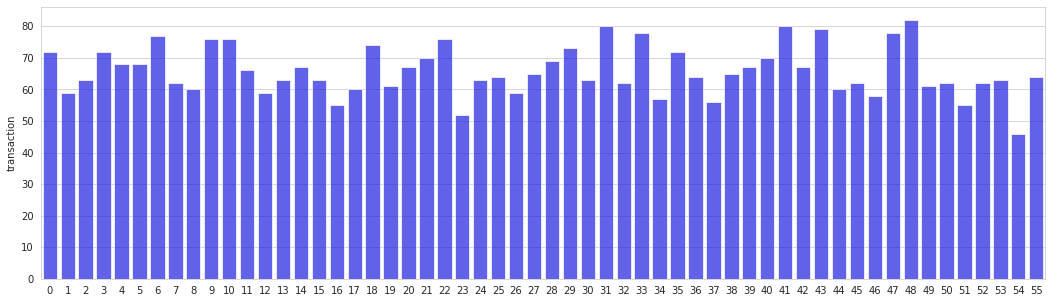

In [57]:
plt.figure(figsize=(18, 5))
sns.set_style('whitegrid')
sns.barplot(x = tt.index, y = tt.transaction, color='blue', alpha = 0.7)

In [58]:
tt.describe()

,transaction
count,56.000000
mean,65.928571
std,7.787769
min,46.000000
25%,61.000000
50%,64.000000
75%,72.000000
max,82.000000


6. К вам пришёл коллега с немного обновленными данными

Постройте сводную таблицу user_vs_minute_pivot, где

    - столбцы – имена пользователей
    - строки – минута времени осуществления операции (minute)
    - значения – число совершённых операций
    - Пропущенные значения заполните нулями.


In [59]:
df_2 = pd.read_csv('https://stepik.org/media/attachments/lesson/361624/transaction_data_updated.csv')
user_vs_minute_pivot = pd.pivot_table(df_2, values='transaction', index='minute',
                    columns=['name'], aggfunc = 'count')
user_vs_minute_pivot.fillna(0, inplace = True)
user_vs_minute_pivot.head()

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0


8. Исправьте ошибку коллеги (если она есть 😉), и посчитайте число минут, прошедших с начала дня. Результат сохраните в колонку true_minute. Постройте график, как в предыдущем стэпе, и посмотрите, произошли ли изменения (график в код включать не нужно).

In [60]:
df['date'] = pd.to_datetime(df['date'])
df['true_minute'] = df['date'].dt.minute + df['date'].dt.hour * 60